In [6]:
import networkx as nx # 图数据挖掘
import numpy as np # 数据分析
import random # 随机数
import pandas as pd
 
# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [7]:
# 导入 csv 文件定义的有向图
df = pd.read_csv('data/harrypotterkgdata.csv')

In [8]:
df


head       tail relation
0        C.沃林顿  斯莱特林魁地奇球队       从属
1        C.沃林顿      调查行动组       从属
2        C.沃林顿   霍格沃茨魔法学校       从属
3       乔治·韦斯莱     亚瑟·韦斯莱       父亲
4       乔治·韦斯莱        凤凰社       从属
...        ...        ...      ...
1733  鲍曼·赖特的父亲       赖特夫人       妻子
1734  鲍曼·赖特的父亲      鲍曼·赖特       儿子
1735   齐格蒙特·巴奇         作家       职业
1736   齐格蒙特·巴奇       巴奇夫人       母亲
1737   齐格蒙特·巴奇        药剂师       职业

[1738 rows x 3 columns]

In [9]:
edges = [edge for edge in zip(df['head'], df['tail'])]
 
G = nx.DiGraph()
G.add_edges_from(edges)

In [10]:
print(G)

DiGraph with 648 nodes and 1716 edges


In [12]:
G.nodes

NodeView(('C.沃林顿', '斯莱特林魁地奇球队', '调查行动组', '霍格沃茨魔法学校', '乔治·韦斯莱', '亚瑟·韦斯莱', '凤凰社', '吉迪翁·普威特', '哈利·波特', '塞德瑞拉·布莱克', '塞德里克·迪戈里', '塞普蒂默斯·韦斯莱', '奥黛丽·韦斯莱', '安吉利娜·约翰逊', '弗雷德·韦斯莱', '弗雷德·韦斯莱二世', '普威特先生', '普威特夫人', '普威特家族', '查理·韦斯莱', '格兰芬多学院', '格兰芬多魁地奇球队', '比利尔斯', '比尔·韦斯莱', '珀西·韦斯莱', '纳威·隆巴顿', '罗克珊·韦斯莱', '罗恩·韦斯莱', '芙蓉·德拉库尔', '莫丽·韦斯莱', '莱姆斯·卢平', '费比安·普威特', '赫敏·格兰杰', '邓布利多军', '金妮·韦斯莱', '阿拉斯托·穆迪', '韦斯莱家族', '韦斯莱魔法把戏坊', '乔治三世', '亨利七世', '威廉一世', '维多利亚', '亚伯拉罕·波特', '波特家族', '美国魔法国会', '詹姆·波特', '伪劣防御咒及防护用品侦查收缴办公室', '伪劣防御咒及防护用品侦查收缴办公室主任', '多米尼克·韦斯莱', '禁止滥用麻瓜物品办公室', '禁止滥用麻瓜物品办公室主任', '穆丽尔', '维克托娃·韦斯莱', '罗丝·韦斯莱', '英国魔法部', '莉莉·卢娜·波特', '莫丽·韦斯莱二世', '莱桑德拉·亚克斯利', '詹姆·小天狼星·波特', '路易·韦斯莱', '阿不思·西弗勒斯·波特', '阿克图勒斯·布莱克二世', '雨果·韦斯莱', '露西·韦斯莱', '魔法法律执行司', '亨利·波特', '威森加摩', '尤菲米娅·波特', '弗利蒙·波特', '波特夫人，原姓弗利蒙', '亨利八世', '伊丽莎白一世', '威廉三世', '安妮·博林', '玛丽一世', '玛丽二世', '亨利六世', '伊万斯姐妹的父亲', '伊万斯夫人', '佩妮·伊万斯', '弗农·德思礼', '莉莉·伊万斯', '达力·德思礼', '伊万杰琳·奥平顿', '伊索特·塞耶', '伊尔弗莫尼魔法学校', '塞耶家族', '威廉·塞耶', '斯图尔特家族', '查威克·布特', '玛莎·斯图尔特二世', '莫瑞根', '萨拉查·斯莱特林', 

In [16]:
Len(G)

NameError: name 'Len' is not defined

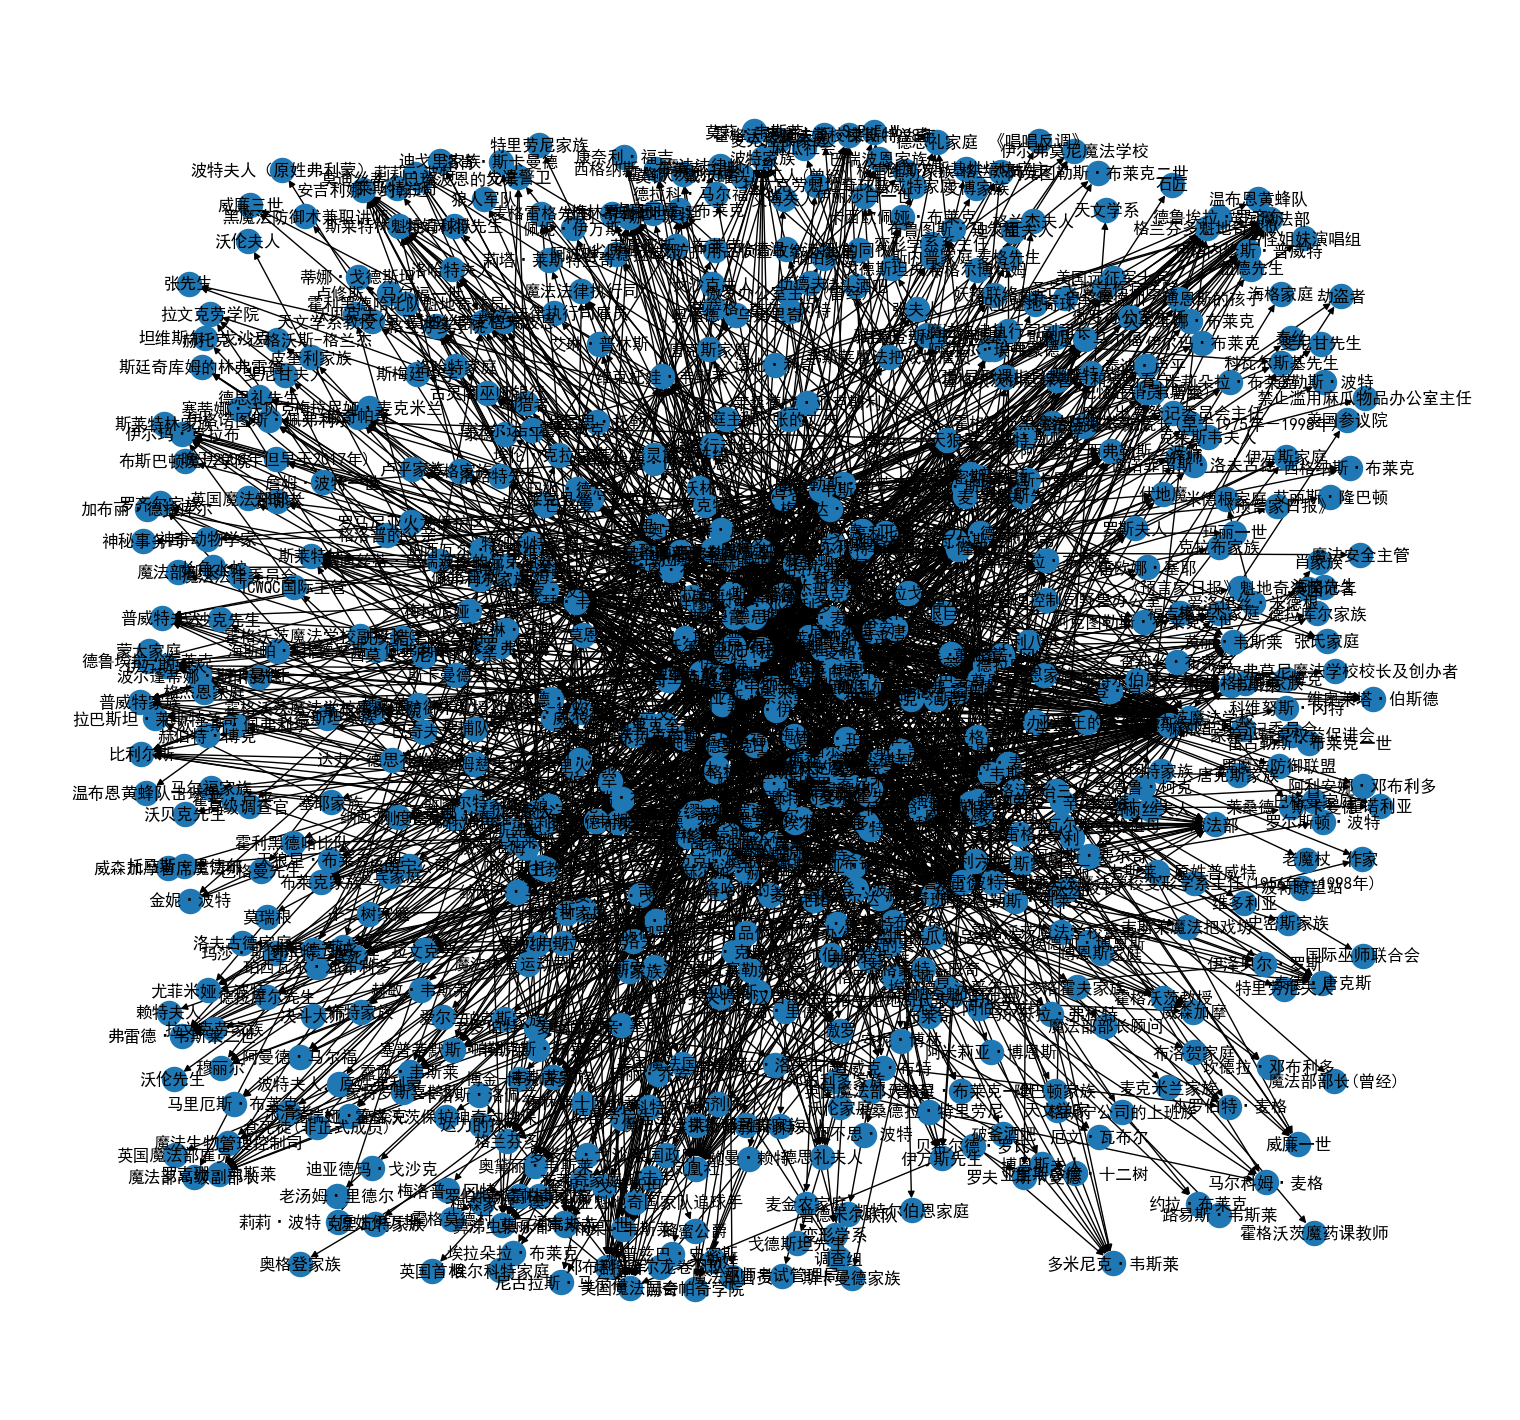

In [18]:
# 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(G, iterations=3, seed=5) #设置为基于弹簧布局，迭代次数为3，次数越多，根据节点之间的相互作用力找到的节点位置越合理
nx.draw(G, pos, with_labels=True)
plt.show()

In [19]:
pagerank = nx.pagerank(G,                     # NetworkX graph 有向图，如果是无向图则自动转为双向有向图
                       alpha=0.85,            # Damping Factor，阻尼系数，理解这个得理解谷歌矩阵，也就是明白算法本身才行
                       personalization=None,  # 是否开启Personalized PageRank，随机传送至指定节点集合的概率更高或更低
                       max_iter=100,          # 最大迭代次数
                       tol=1e-06,             # 判定收敛的误差
                       nstart=None,           # 每个节点初始PageRank值      
                       dangling=None,         # Dead End死胡同节点
                      )

In [20]:
pagerank

{'C.沃林顿': 0.0011475314330162943,
 '斯莱特林魁地奇球队': 0.0027238782181771616,
 '调查行动组': 0.0018337860389585634,
 '霍格沃茨魔法学校': 0.025270377379097698,
 '乔治·韦斯莱': 0.0016518470047273744,
 '亚瑟·韦斯莱': 0.001919820640437418,
 '凤凰社': 0.0041597878081630684,
 '吉迪翁·普威特': 0.0015170376893856247,
 '哈利·波特': 0.003478339915987951,
 '塞德瑞拉·布莱克': 0.0015202090673998125,
 '塞德里克·迪戈里': 0.0016668229203842615,
 '塞普蒂默斯·韦斯莱': 0.0014694435787599427,
 '奥黛丽·韦斯莱': 0.0015014805076959017,
 '安吉利娜·约翰逊': 0.0015537766547853021,
 '弗雷德·韦斯莱': 0.0020296833909261465,
 '弗雷德·韦斯莱二世': 0.0014945054883278813,
 '普威特先生': 0.001634297189254643,
 '普威特夫人': 0.001634297189254643,
 '普威特家族': 0.0017686849177382313,
 '查理·韦斯莱': 0.0015214363932565399,
 '格兰芬多学院': 0.0015702345769121671,
 '格兰芬多魁地奇球队': 0.002619706982580307,
 '比利尔斯': 0.001634297189254643,
 '比尔·韦斯莱': 0.0015236489392847657,
 '珀西·韦斯莱': 0.0016630878618137108,
 '纳威·隆巴顿': 0.0028753495641992734,
 '罗克珊·韦斯莱': 0.0015537766547853021,
 '罗恩·韦斯莱': 0.0021217191528740786,
 '芙蓉·德拉库尔': 0.0021132730228556017,
 '莫丽·韦斯

In [26]:
sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

[('霍格沃茨魔法学校', 0.025270377379097698),
 ('美国魔法国会', 0.0111635122688707),
 ('英国魔法部', 0.01055747811015212),
 ('魔法部', 0.005981025374663729),
 ('莫迪丝蒂·巴瑞波恩', 0.00446446534557678),
 ('秋·张', 0.0043675090360895865),
 ('凤凰社', 0.0041597878081630684),
 ('小亨利·肖', 0.00396574661310703),
 ('鼻涕虫俱乐部', 0.003716185458476508),
 ('食死徒', 0.0036920571771065606),
 ('斯莱特林', 0.0036914791301060497),
 ('哈利·波特', 0.003478339915987951),
 ('兰登·肖', 0.0033818974877009474),
 ('老亨利·肖', 0.0033818974877009474),
 ('威廉一世', 0.0033412088969898153),
 ('邓布利多军', 0.003262377574330015),
 ('霍格沃茨', 0.003157988749458249),
 ('梅森家庭', 0.0030988371479896176),
 ('雅各布·科瓦尔斯基', 0.0030988371479896176),
 ('格兰芬多', 0.0030933172566557504),
 ('鲁伯·海格', 0.0030805470388461107),
 ('拉文克劳', 0.0030684038154989582),
 ('赫敏·格兰杰', 0.003067152893963242),
 ('麦格雷格先生', 0.0030140266199595147),
 ('麦格雷格夫人', 0.0030140266199595147),
 ('德拉科·马尔福', 0.0028855017098174283),
 ('纳威·隆巴顿', 0.0028753495641992734),
 ('科瓦尔斯基先生', 0.002781884830685038),
 ('斯莱特林魁地奇球队', 0.00272387821817

In [27]:
# 节点尺寸
node_sizes = (np.array(list(pagerank.values())) * 8000).astype(int)

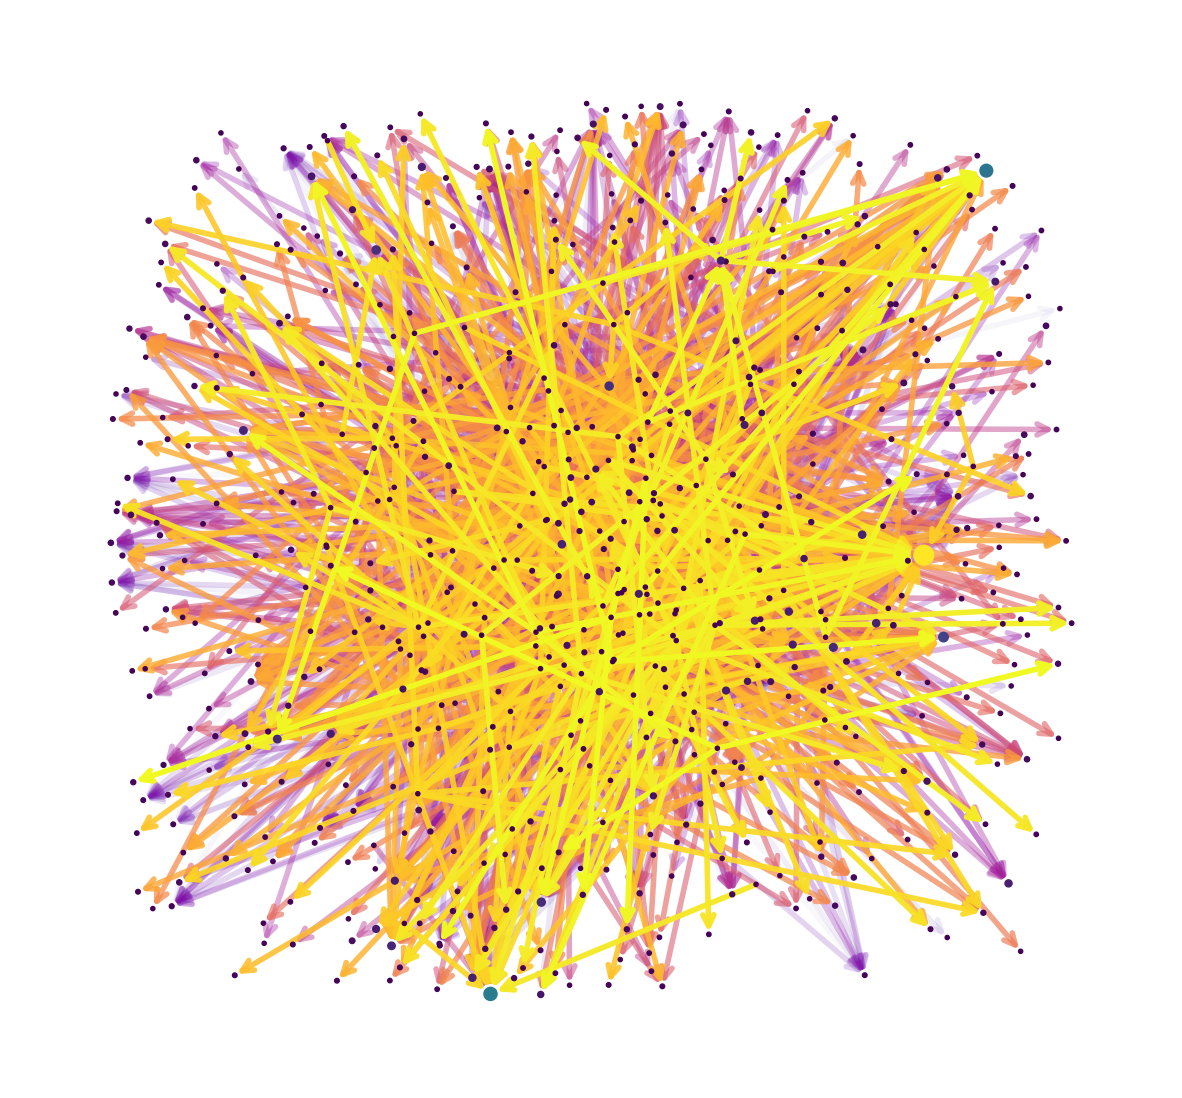

In [29]:
# 节点颜色
M = G.number_of_edges()
edge_colors = range(2, M + 2)
 
 
plt.figure(figsize=(15,14))
 
# 绘制节点
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_sizes)
 
# 绘制连接
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,   # 节点尺寸
    arrowstyle="->",        # 箭头样式
    arrowsize=20,           # 箭头尺寸
    edge_color=edge_colors, # 连接颜色
    edge_cmap=plt.cm.plasma,# 连接配色方案，可选：plt.cm.Blues
    width=4                 # 连接线宽
)
 
# 设置每个连接的透明度
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
 
# # 图例
# pc = mpl.collections.PatchCollection(edges, cmap=cmap)
# pc.set_array(edge_colors)
# plt.colorbar(pc)
 
ax = plt.gca()
ax.set_axis_off()
plt.show()